In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
# Load dataset
df = pd.read_csv('reviews_dataset.csv')

In [4]:
# Data Overview
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310 entries, 0 to 3309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ProductTitle   3310 non-null   object
 1   ReviewTitle    3310 non-null   object
 2   ReviewContent  3310 non-null   object
 3   Date           3310 non-null   object
 4   Rating         3310 non-null   int64 
 5   Author         3310 non-null   object
 6   Country        3310 non-null   object
 7   Sentiment      3310 non-null   object
 8   Category       3310 non-null   object
 9   Generation     3310 non-null   object
dtypes: int64(1), object(9)
memory usage: 258.7+ KB
None
            Rating
count  3310.000000
mean      4.578550
std       1.012625
min       1.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000


In [5]:
# Check for missing values
print(df.isnull().sum())

ProductTitle     0
ReviewTitle      0
ReviewContent    0
Date             0
Rating           0
Author           0
Country          0
Sentiment        0
Category         0
Generation       0
dtype: int64


In [6]:
# Dropping unnecessary columns
df = df.drop(columns=['ProductTitle', 'ReviewTitle', 'Author'])

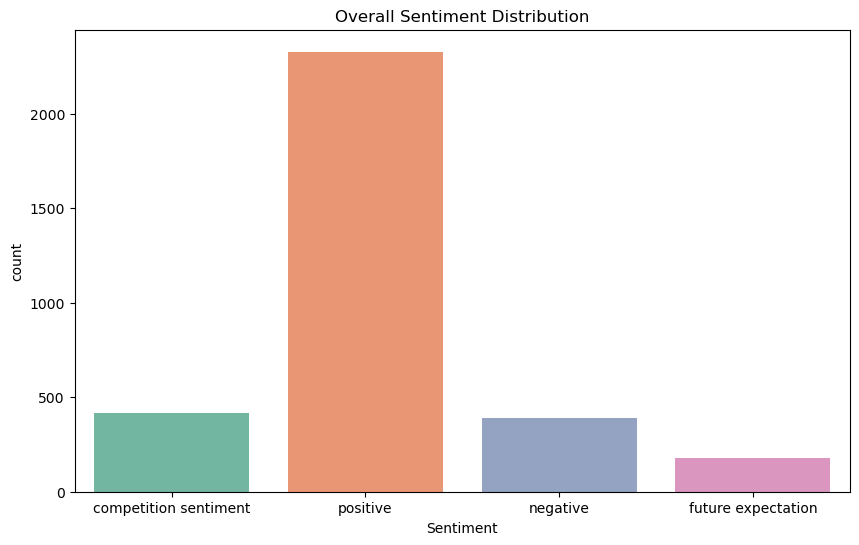

In [7]:
# Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title('Overall Sentiment Distribution')
plt.show()

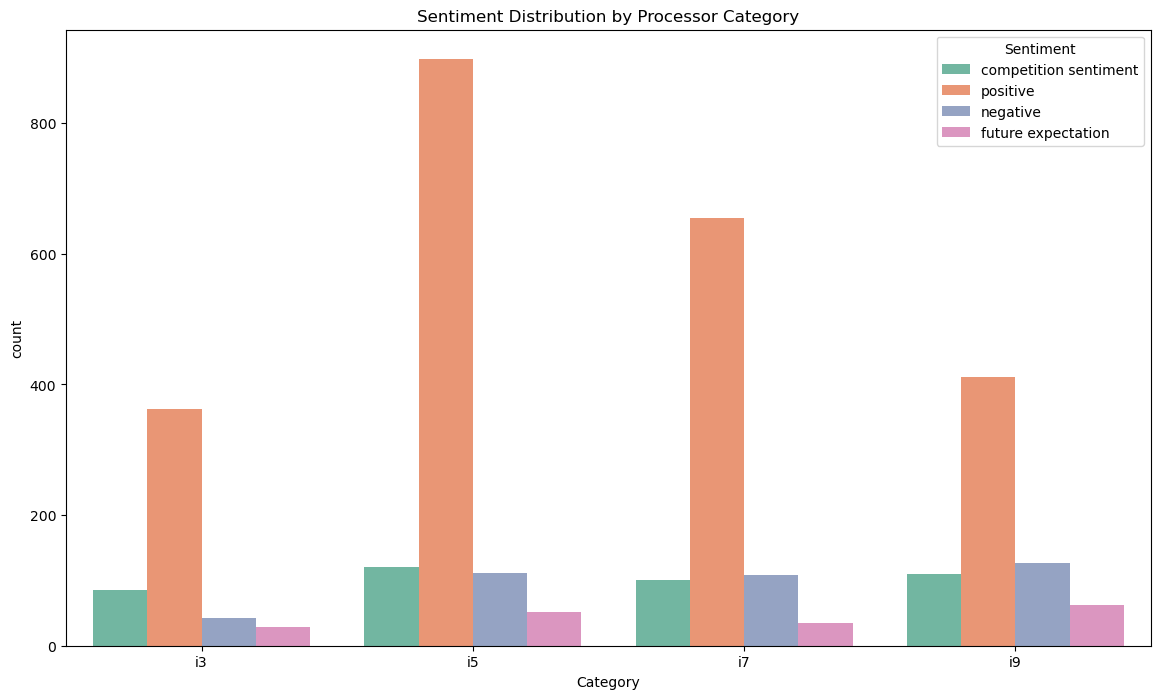

In [8]:
# Sentiment Distribution by Processor Category
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Category', hue='Sentiment', palette='Set2')
plt.title('Sentiment Distribution by Processor Category')
plt.show()

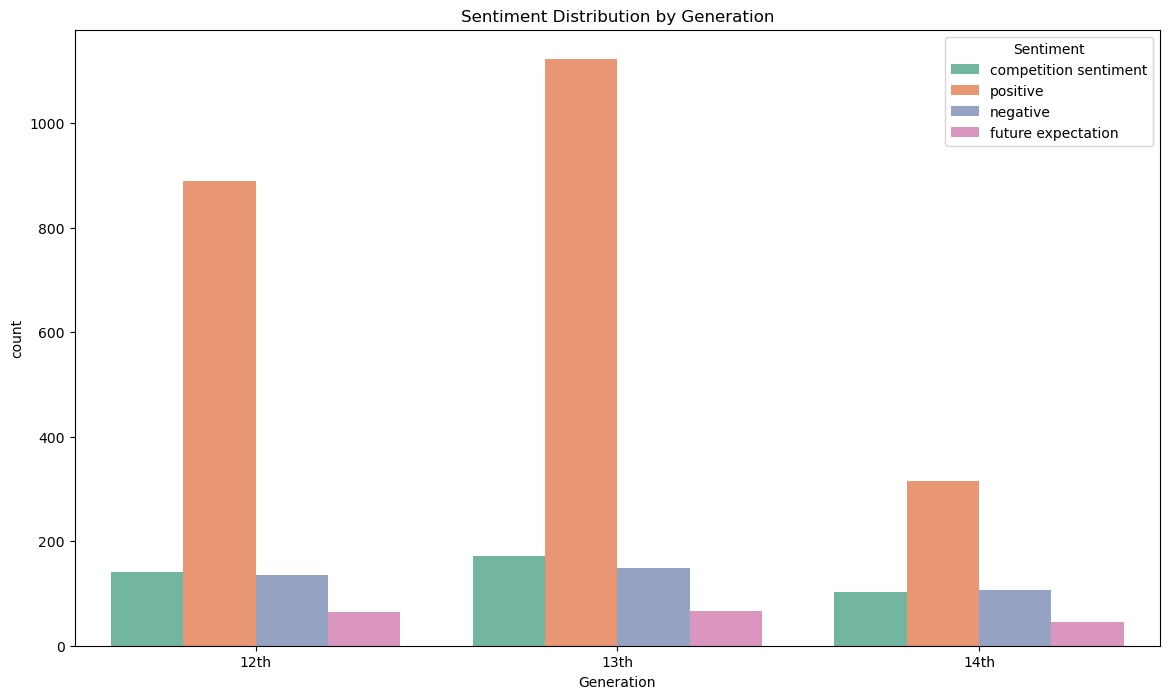

In [9]:
# Sentiment Distribution by Generation
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Generation', hue='Sentiment', palette='Set2')
plt.title('Sentiment Distribution by Generation')
plt.show()

C:\Users\arjun\AppData\Local\Temp\ipykernel_22464\1411997066.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Rating', bins=10, kde=True, palette='Set2')
C:\Users\arjun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


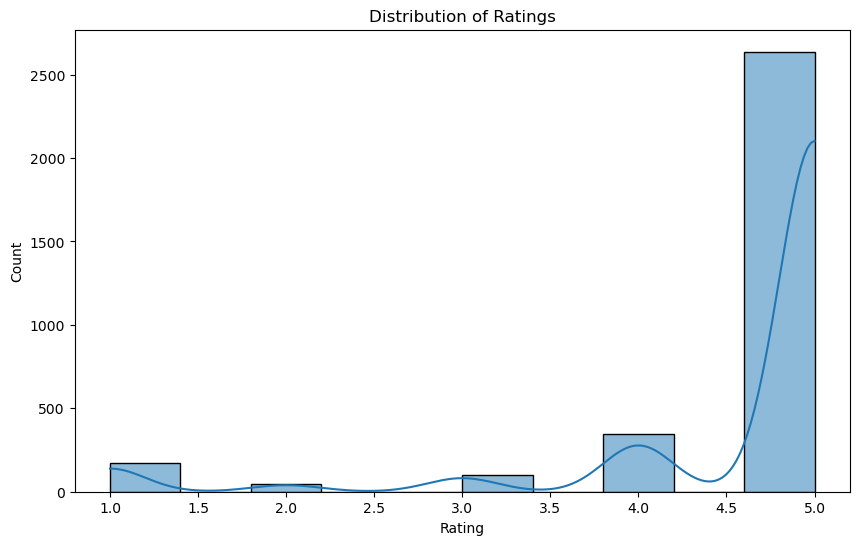

In [10]:
# Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', bins=10, kde=True, palette='Set2')
plt.title('Distribution of Ratings')
plt.show()

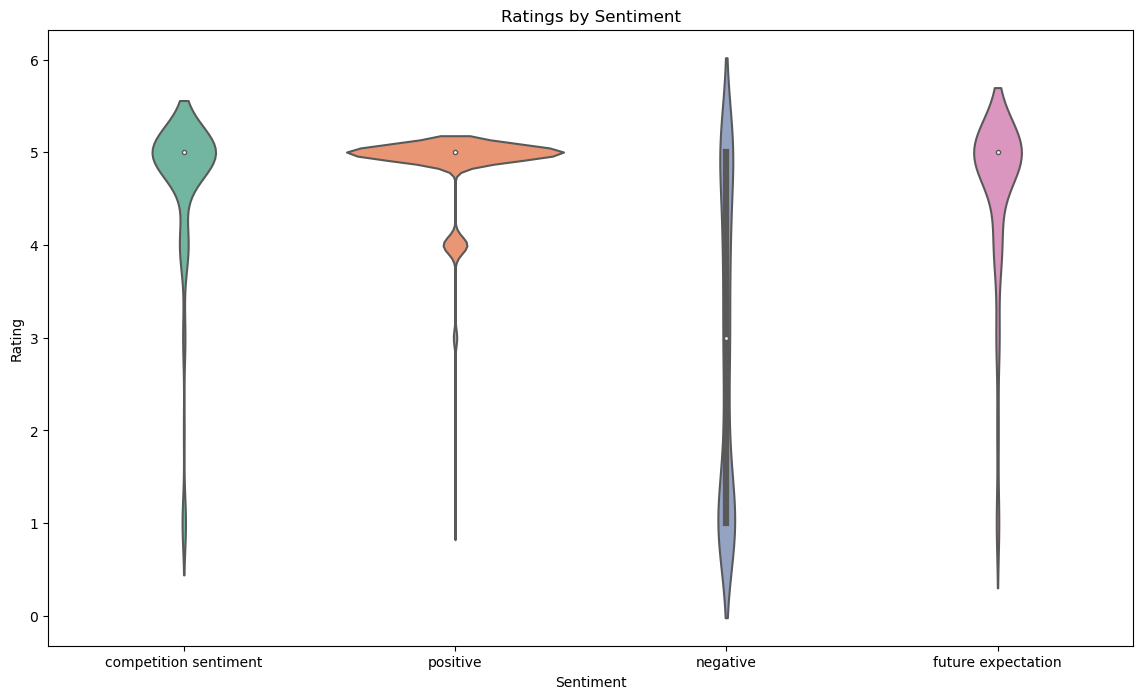

In [12]:
#violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='Sentiment', y='Rating', palette='Set2')
plt.title('Ratings by Sentiment')
plt.show()


C:\Users\arjun\AppData\Local\Temp\ipykernel_22464\3210421513.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='Sentiment', y='Rating', palette='Set2', jitter=True)
C:\Users\arjun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arjun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


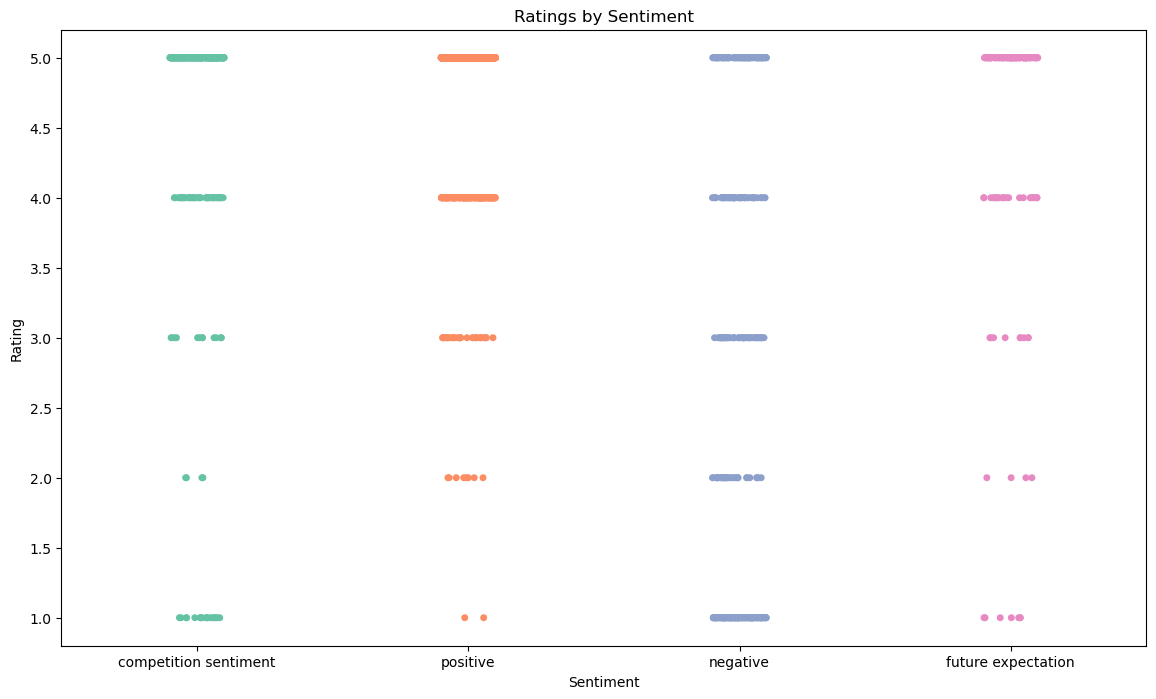

In [14]:
#strip plot(ratings by sentiment)
plt.figure(figsize=(14, 8))
sns.stripplot(data=df, x='Sentiment', y='Rating', palette='Set2', jitter=True)
plt.title('Ratings by Sentiment')
plt.show()


C:\Users\arjun\AppData\Local\Temp\ipykernel_22464\2238527849.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


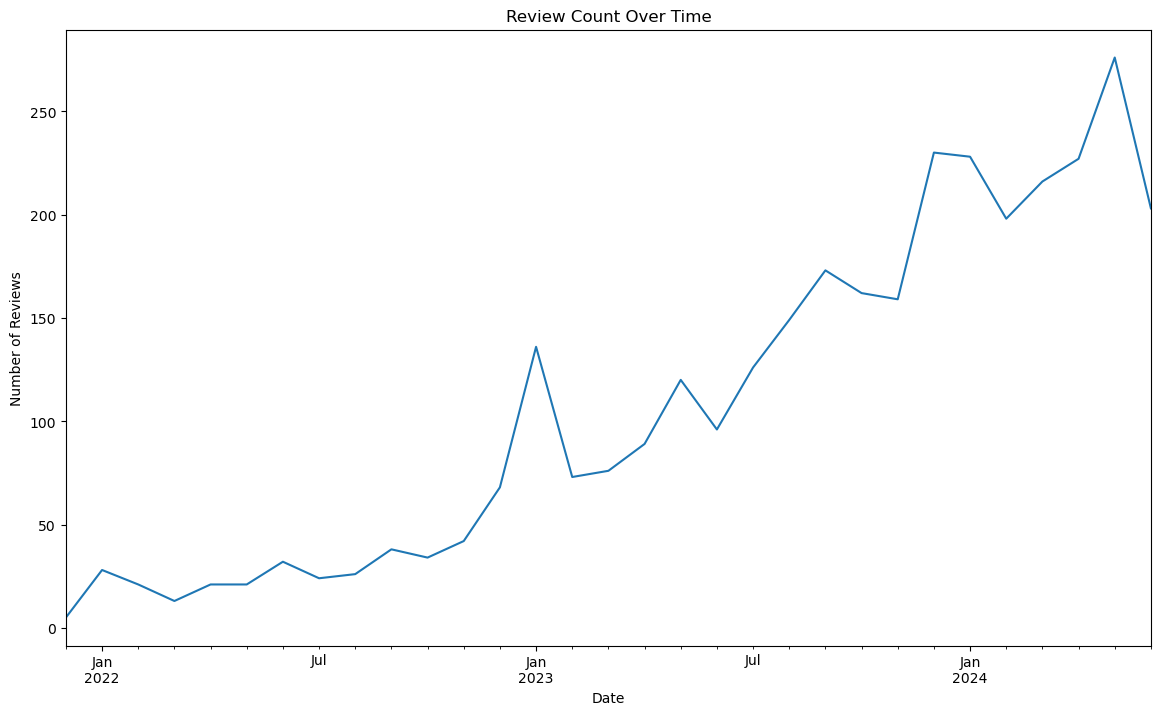

<Figure size 1400x800 with 0 Axes>

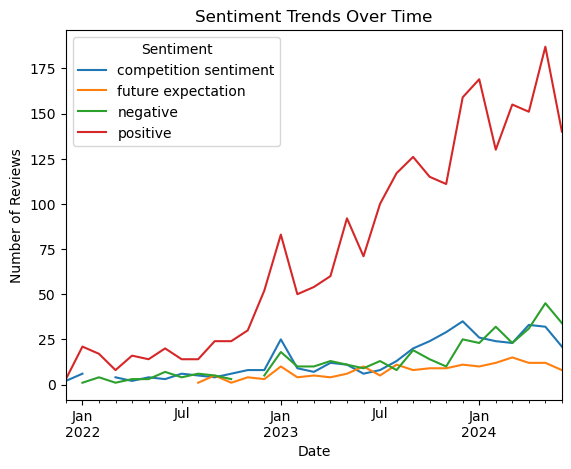

In [15]:
# Temporal Analysis
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')

plt.figure(figsize=(14, 8))
df.groupby('YearMonth').size().plot()
plt.title('Review Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

plt.figure(figsize=(14, 8))
df.groupby(['YearMonth', 'Sentiment']).size().unstack().plot()
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

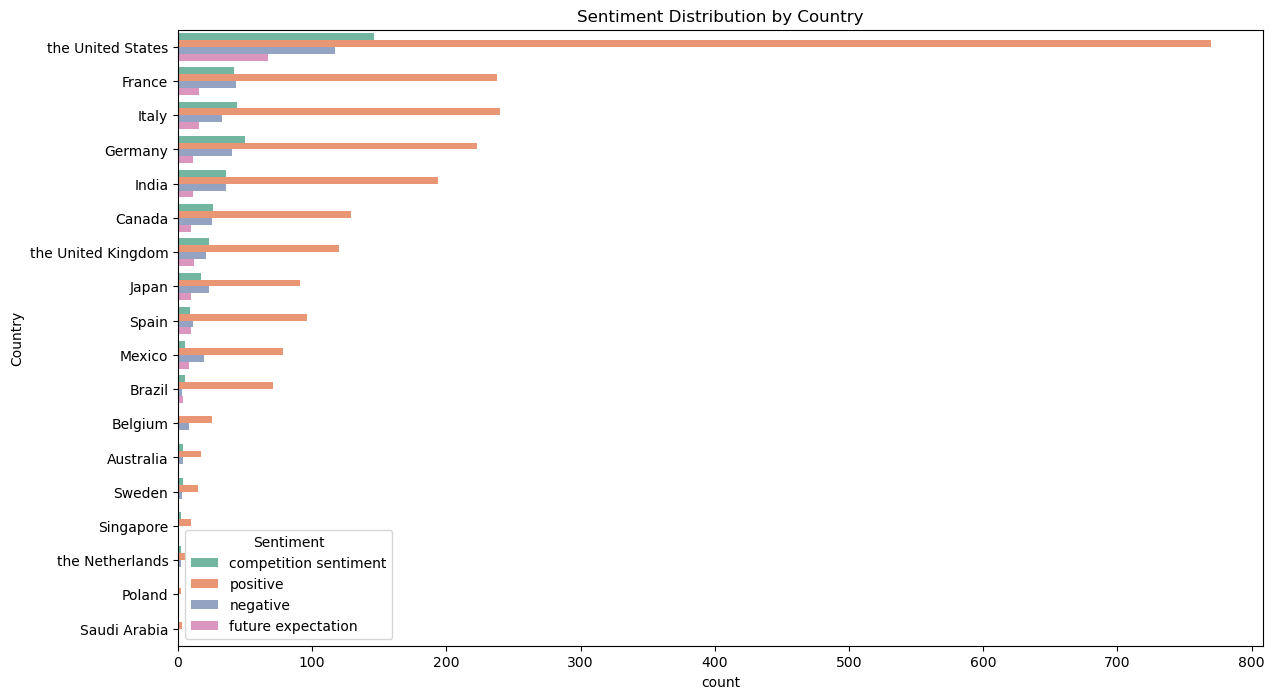

In [16]:
# Geographical Analysis
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='Country', hue='Sentiment', palette='Set2', order=df['Country'].value_counts().index)
plt.title('Sentiment Distribution by Country')
plt.show()


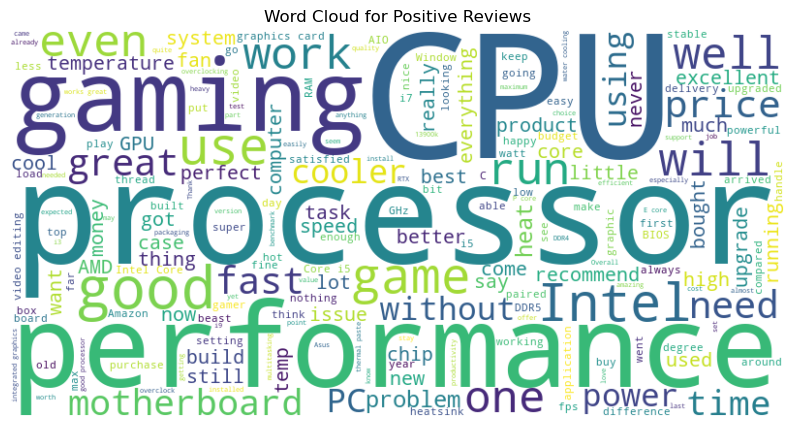

In [20]:
#Generate word cloud for positive reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 'positive']['ReviewContent'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

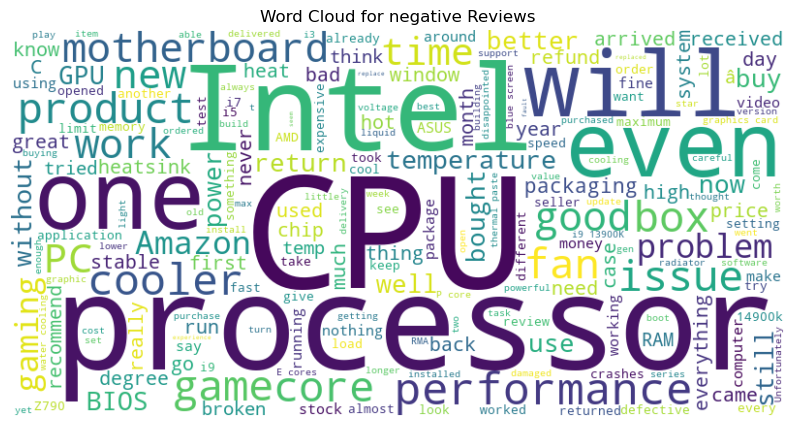

In [22]:
# Example: Generate word cloud for negative reviews
negative_reviews = ' '.join(df[df['Sentiment'] == 'negative']['ReviewContent'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for negative Reviews')
plt.axis('off')
plt.show()

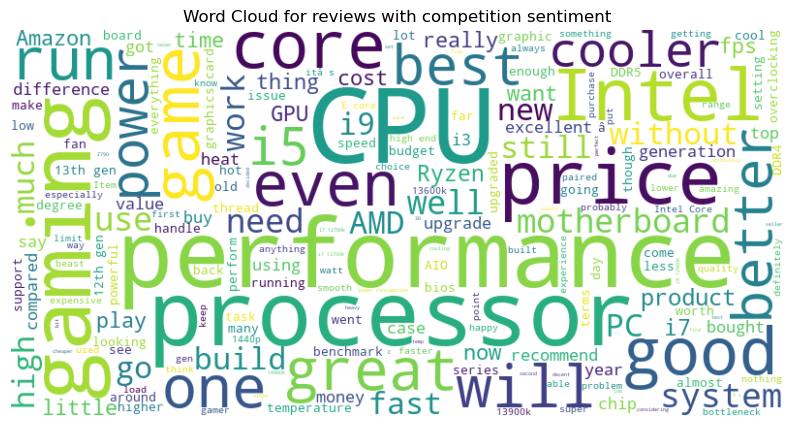

In [23]:
# Example: Generate word cloud for reviews with competition sentiments
competition_reviews = ' '.join(df[df['Sentiment'] == 'competition sentiment']['ReviewContent'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(competition_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for reviews with competition sentiment')
plt.axis('off')
plt.show()

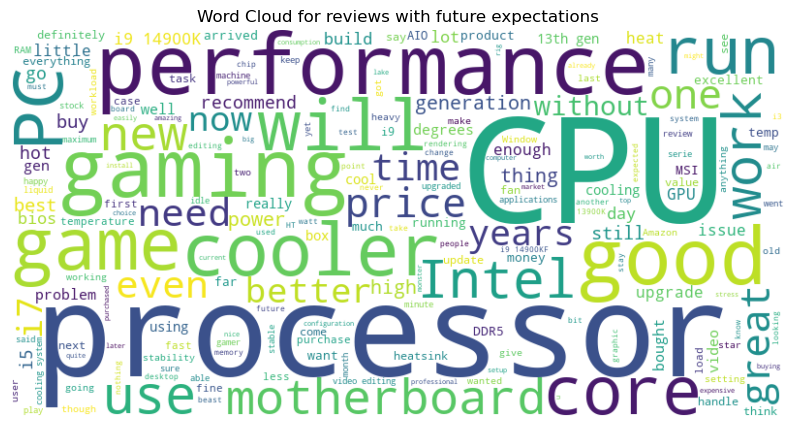

In [24]:
# Example: Generate word cloud for positive reviews
fe_reviews = ' '.join(df[df['Sentiment'] == 'future expectation']['ReviewContent'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fe_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for reviews with future expectations')
plt.axis('off')
plt.show()

C:\Users\arjun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x800 with 0 Axes>

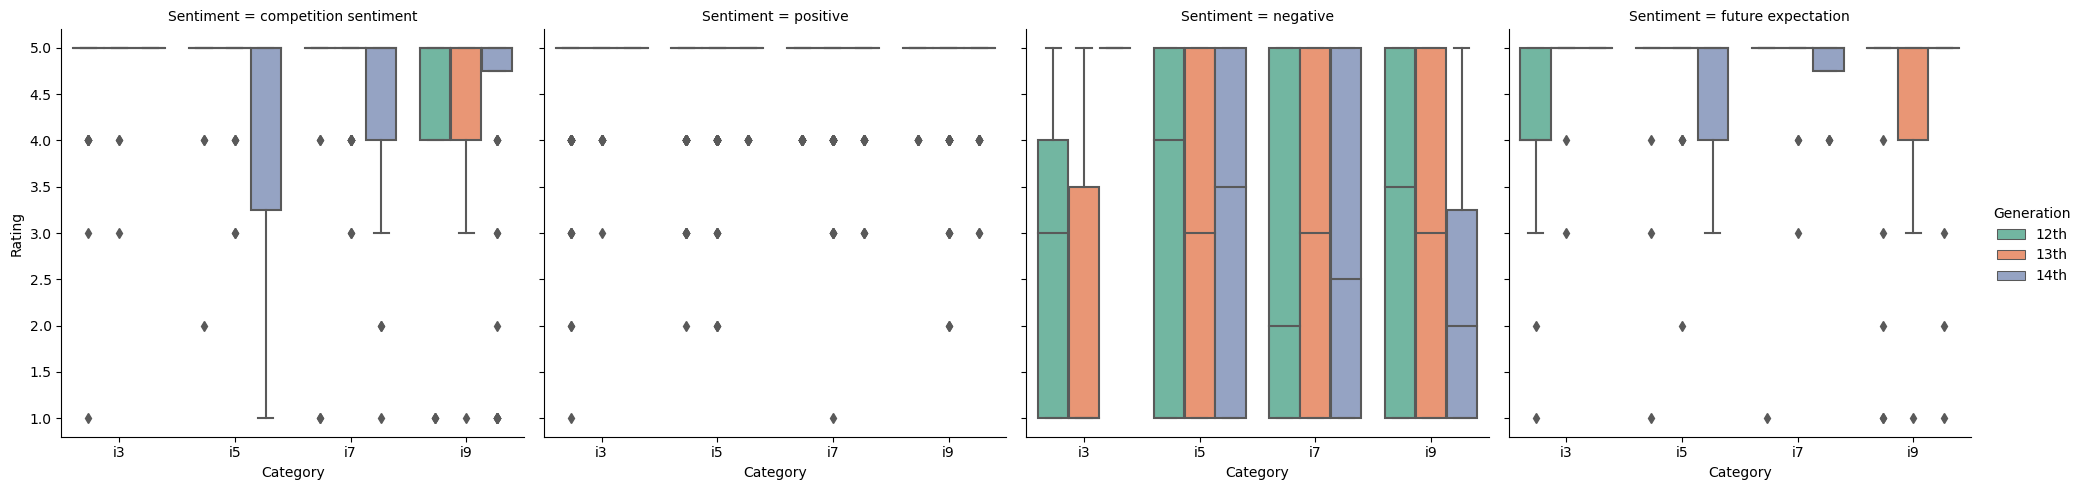

In [26]:
# Segmentation Analysis by Processor Type and Generation
plt.figure(figsize=(14, 8))
sns.catplot(data=df, x='Category', y='Rating', hue='Generation', col='Sentiment', kind='box', palette='Set2')
plt.show()

C:\Users\arjun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


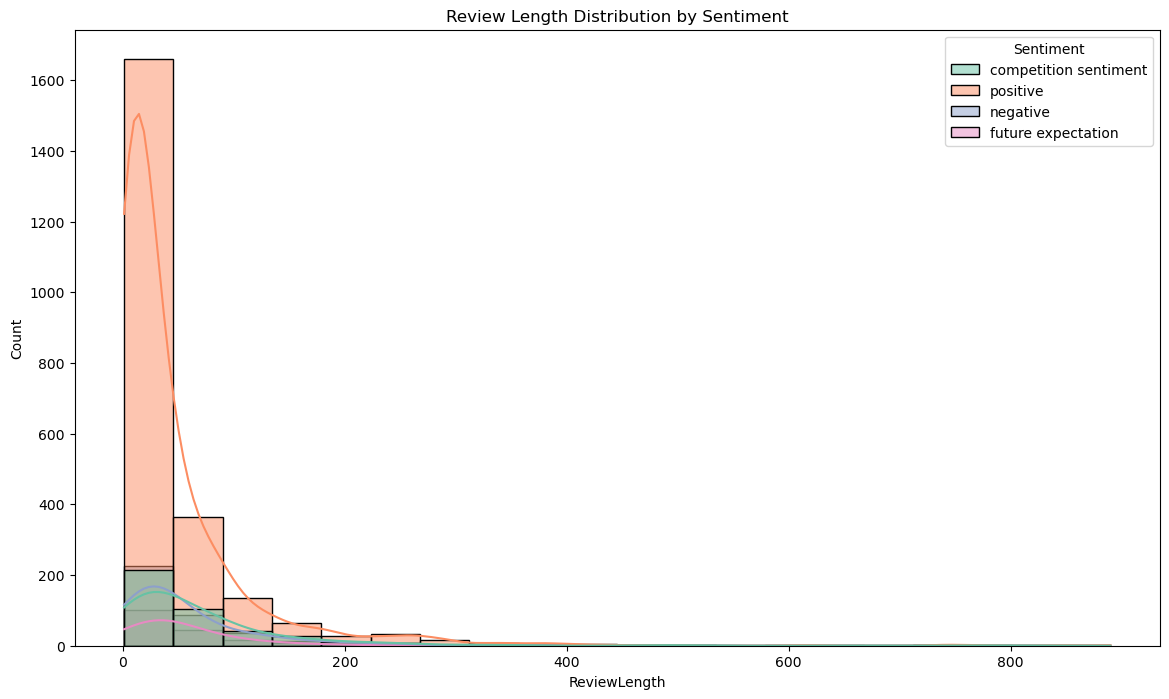

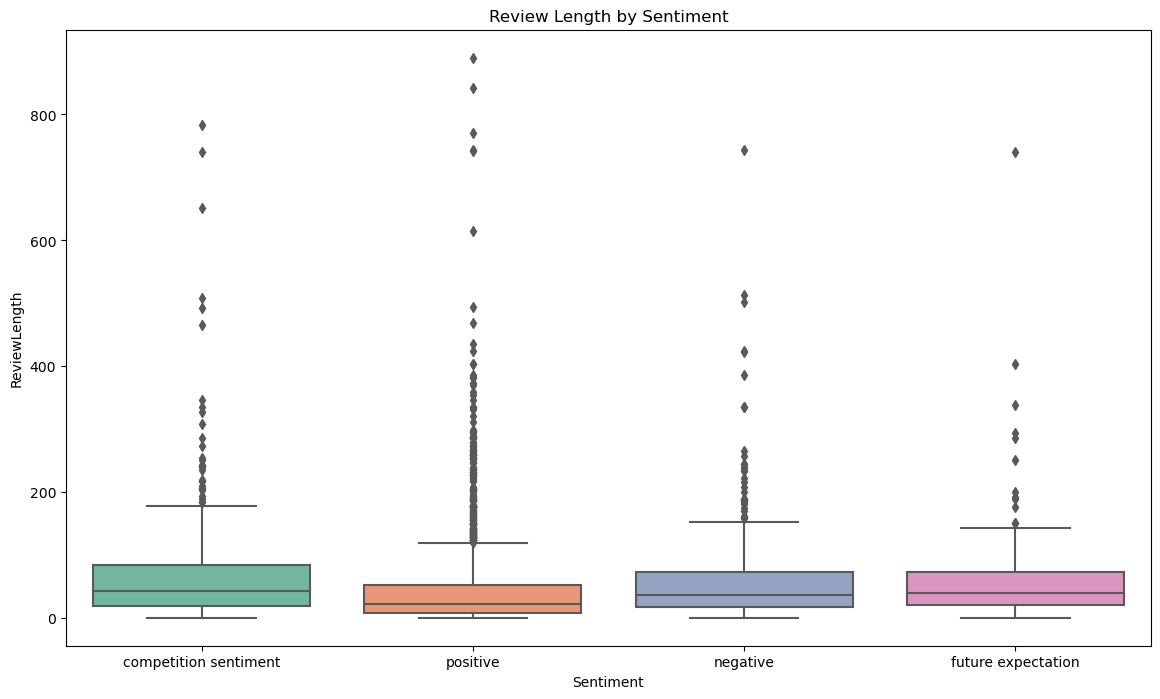

In [27]:
#review length analysis
df['ReviewLength'] = df['ReviewContent'].apply(lambda x: len(x.split()))

plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='ReviewLength', hue='Sentiment', kde=True, palette='Set2', bins=20)
plt.title('Review Length Distribution by Sentiment')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Sentiment', y='ReviewLength', palette='Set2')
plt.title('Review Length by Sentiment')
plt.show()


In [28]:
#topic modelling
import gensim
from gensim import corpora

# Preprocess text data
def preprocess(text):
    return [word for word in text.lower().split() if word.isalpha()]

df['ProcessedContent'] = df['ReviewContent'].apply(preprocess)

# Create dictionary and corpus
dictionary = corpora.Dictionary(df['ProcessedContent'])
corpus = [dictionary.doc2bow(text) for text in df['ProcessedContent']]

# Apply LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.046*"i" + 0.041*"the" + 0.034*"and" + 0.033*"with" + 0.027*"a"')
(1, '0.047*"the" + 0.037*"a" + 0.032*"it" + 0.030*"and" + 0.028*"to"')
(2, '0.059*"the" + 0.039*"and" + 0.033*"for" + 0.027*"a" + 0.023*"of"')
(3, '0.057*"the" + 0.042*"i" + 0.034*"to" + 0.031*"and" + 0.028*"a"')
(4, '0.074*"the" + 0.043*"it" + 0.037*"and" + 0.030*"i" + 0.024*"was"')


C:\Users\arjun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arjun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arjun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x800 with 0 Axes>

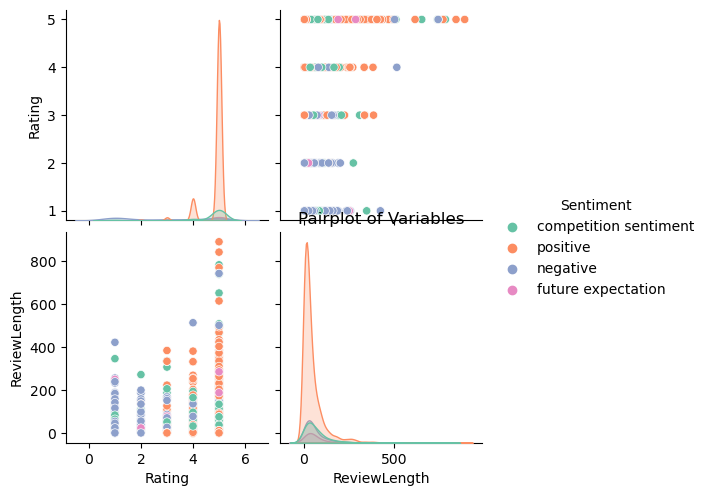

In [29]:
#Bivariate analysis
plt.figure(figsize=(14, 8))
sns.pairplot(df, hue='Sentiment', palette='Set2')
plt.title('Pairplot of Variables')
plt.show()


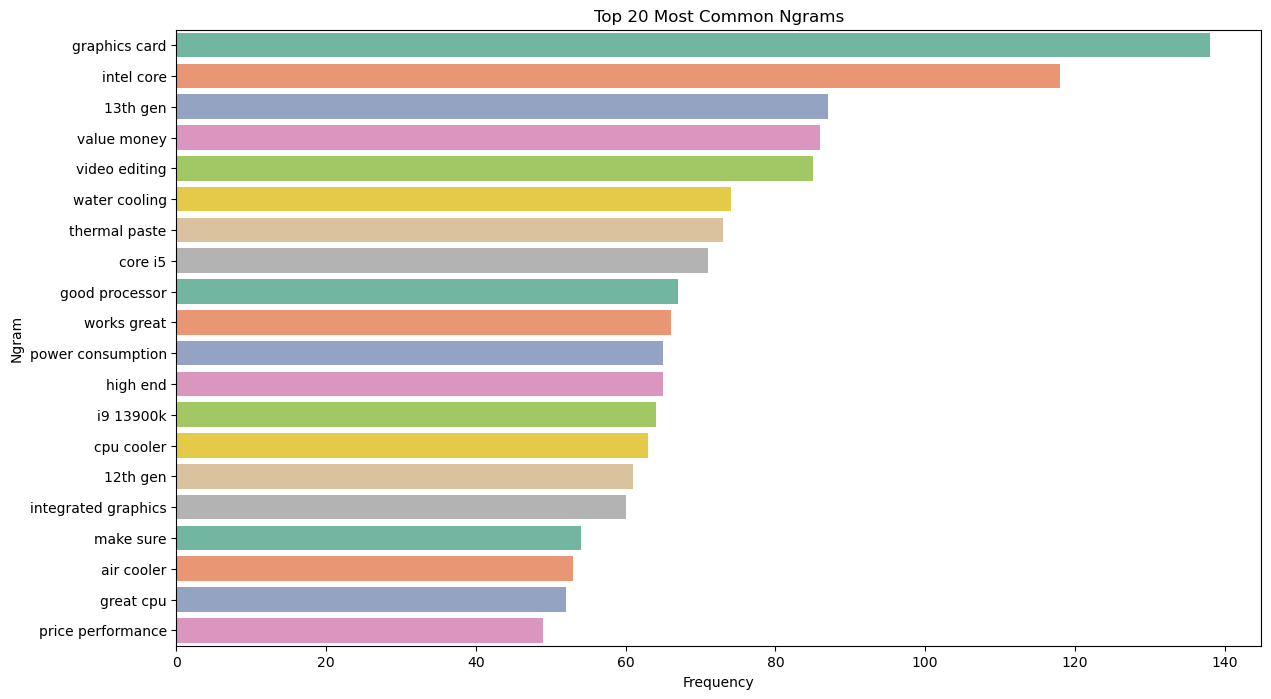

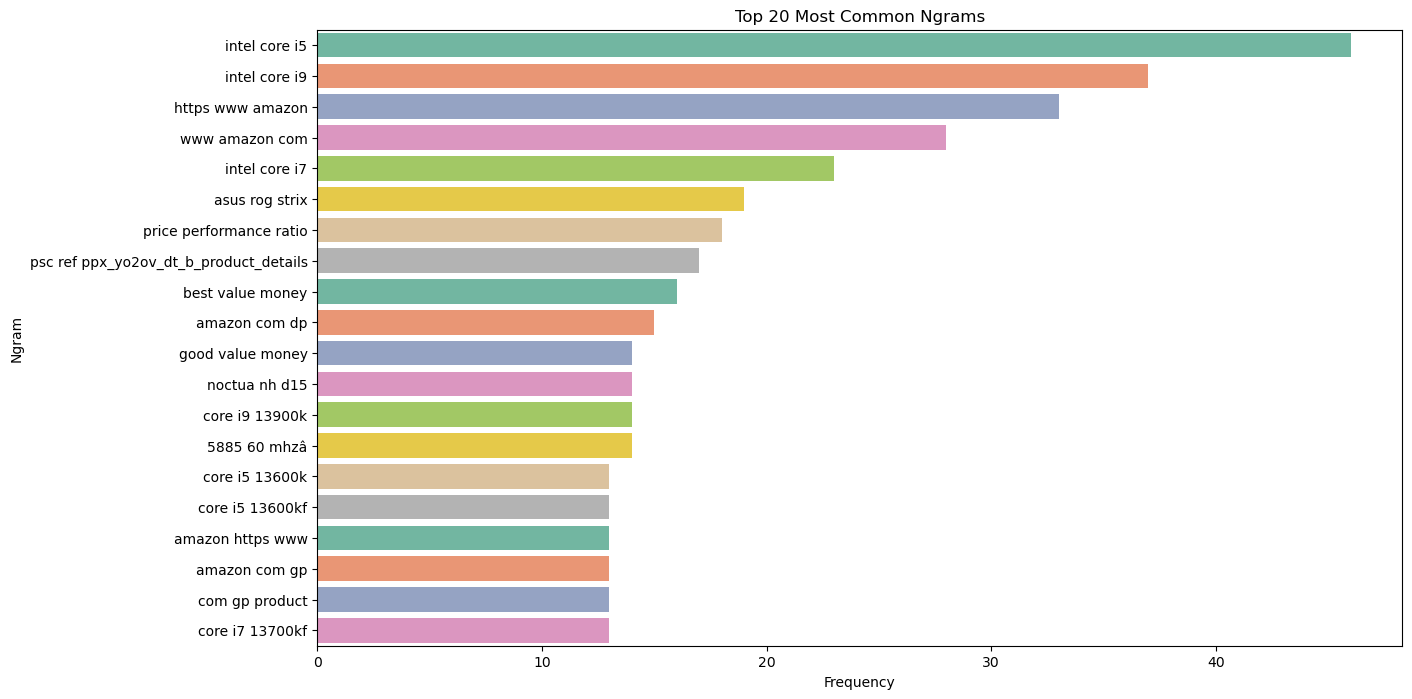

In [30]:
#N-gram analysis
from sklearn.feature_extraction.text import CountVectorizer

def plot_ngrams(data, ngram_range=(2, 2), num=20):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(data)
    bag_of_words = vec.transform(data)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    ngrams = pd.DataFrame(words_freq[:num], columns=['Ngram', 'Frequency'])
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Frequency', y='Ngram', data=ngrams, palette='Set2')
    plt.title(f'Top {num} Most Common Ngrams')
    plt.show()

# Plot bigrams
plot_ngrams(df['ReviewContent'], ngram_range=(2, 2), num=20)

# Plot trigrams
plot_ngrams(df['ReviewContent'], ngram_range=(3, 3), num=20)
